In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Random sampling

In [2]:
loans_income = pd.read_csv('loans_income.csv')

In [4]:
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [5]:
loans_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [12]:
loans_income.sample(1000)

,x
32213,90000
16213,114000
22380,66900
18495,40000
25283,59506
...,...
38854,49000
30845,32000
34455,85000
45327,78000


In [16]:
loans_income.sample(1000)['x'].values

array([ 62500,  20000, 110000,  68350,  40000, 120000,  70000,  74000,
        36000,  66948,  40000,  77000,  40000, 110000, 175000,  48000,
        65000, 142000,  77000,  51000, 150000,  35100,  90000,  22000,
       110000,  45000, 180000,  50000, 137000,  68500,  57646,  27000,
        57000, 103000,  63000,  55250,  20000,  52000,  83000,  55000,
       115000,  50000,  65000,  44638,  60000,  35000,  50000,  56400,
        53000,  60000, 100000,  90000,  75000,  50000, 105000,  48000,
        46000,  45000, 125000,  80000,  42000, 100000,  63000, 184000,
       155000,  45000,  44000,  50000,  48000,  21000,  40000,  31200,
        45000, 105000,  45000,  60000, 140000, 116000, 134500,  90000,
        49000,  24000,  48000,  68000,  89000,  78000, 175000,  55000,
        55000, 145000,  75000,  70000,  50000,  53000,  35000,  45000,
        70000,  42000,  45000,  75000,  64000,  97000,  48000,  60000,
        80160,  57000,  50000,  48000, 100000,  62000, 115000,  53600,
      

In [17]:
sample_data = pd.DataFrame({
 'income': loans_income.sample(1000)['x'].values,
 'type': 'Data',
})


In [18]:
sample_data.head()

,income,type
0,55000,Data
1,40000,Data
2,47000,Data
3,82156,Data
4,88000,Data


In [29]:
sample_mean_05 = pd.DataFrame({
 'income': [loans_income.sample(5).mean().values[0] for _ in range(1000)],
 'type': 'Mean of 5',
})

In [30]:
loans_income.sample(5).mean().values

array([57100.])

In [31]:
sample_mean_05.head()

,income,type
0,70476.0,Mean of 5
1,75400.0,Mean of 5
2,65200.0,Mean of 5
3,79298.6,Mean of 5
4,80898.0,Mean of 5


In [32]:
sample_mean_20 = pd.DataFrame({
 'income': [loans_income.sample(20).mean().values[0] for _ in range(1000)],
 'type': 'Mean of 20',
})


In [33]:
sample_mean_20.head()

,income,type
0,65683.00,Mean of 20
1,67054.50,Mean of 20
2,73665.00,Mean of 20
3,60710.70,Mean of 20
4,68876.75,Mean of 20


In [34]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])


In [35]:
results

,income,type
0,55000.0,Data
1,40000.0,Data
2,47000.0,Data
3,82156.0,Data
4,88000.0,Data
...,...,...
995,75807.7,Mean of 20
996,69616.2,Mean of 20
997,63802.8,Mean of 20
998,80195.0,Mean of 20


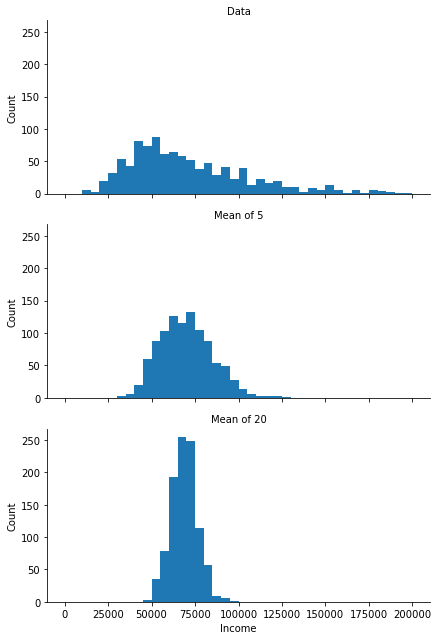

In [45]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=3, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')